In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [2]:

# Load the train dataset
train_dataset = pd.read_csv("train_dataset.csv")

# Load the test dataset
test_dataset = pd.read_csv("test_dataset.csv")

#Check the shape of the dataset
print(train_dataset.shape)
print(test_dataset.shape)

#Check the top few rows of the dataset
print(train_dataset.head())



(38984, 23)
(16708, 22)
   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
0   35         170          85       97.0             0.9              0.9   
1   20         175         110      110.0             0.7              0.9   
2   45         155          65       86.0             0.9              0.9   
3   45         165          80       94.0             0.8              0.7   
4   20         165          60       81.0             1.5              0.1   

   hearing(left)  hearing(right)  systolic  relaxation  ...  HDL  LDL  \
0              1               1       118          78  ...   70  142   
1              1               1       119          79  ...   71  114   
2              1               1       110          80  ...   57  112   
3              1               1       158          88  ...   46   91   
4              1               1       109          64  ...   47   92   

   hemoglobin  Urine protein  serum creatinine   AST   ALT  Gtp  \
0

In [3]:
# Check for missing values
print(train_dataset.isnull().sum())
# Handle missing values by removing the rows with missing values
train_dataset = train_dataset.dropna()


age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64


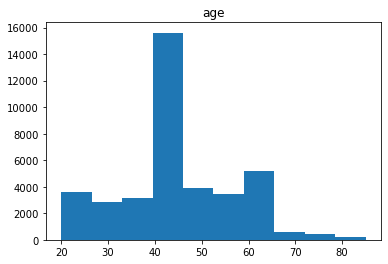

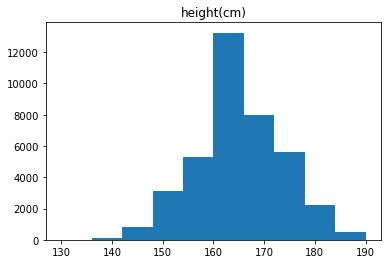

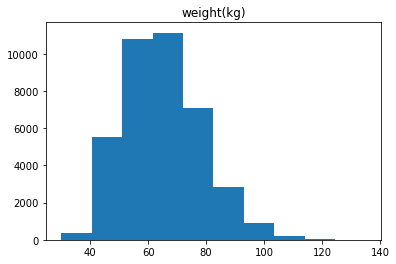

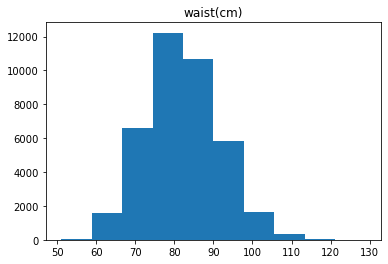

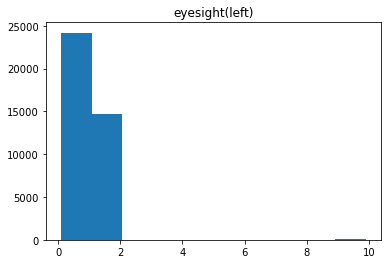

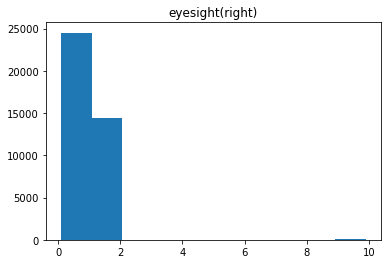

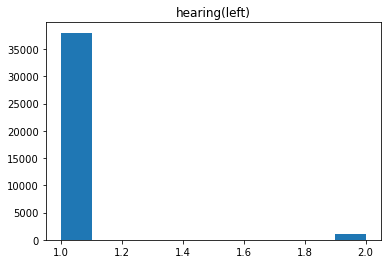

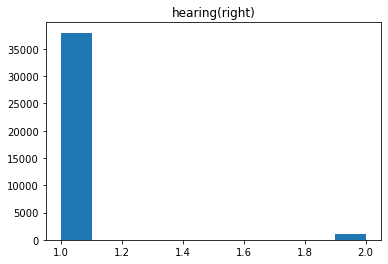

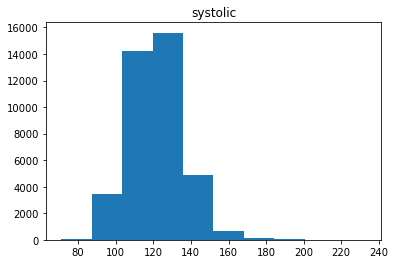

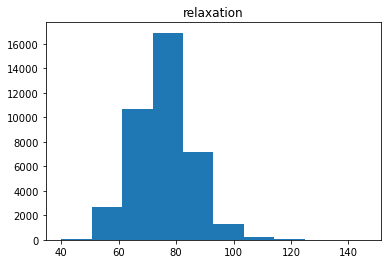

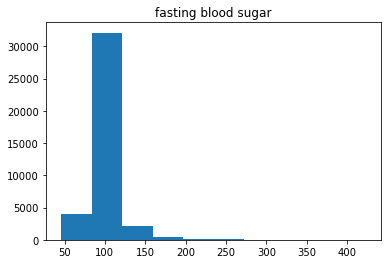

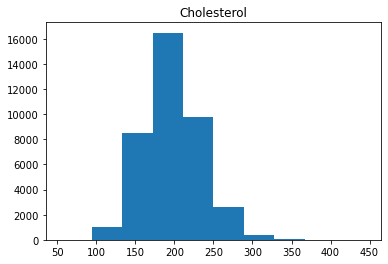

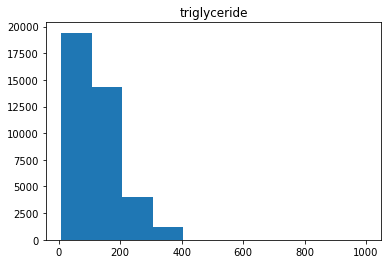

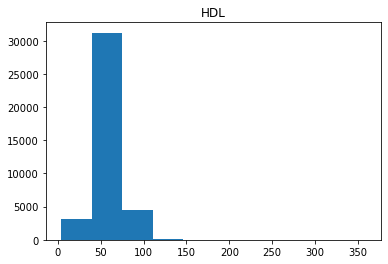

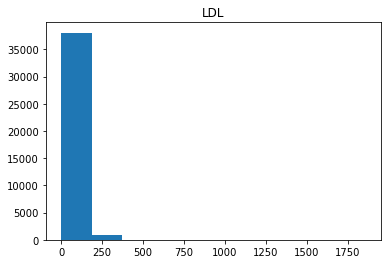

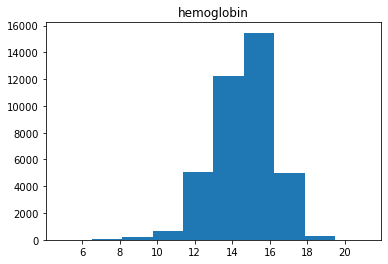

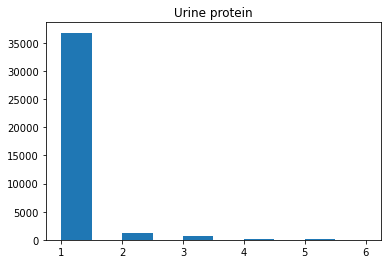

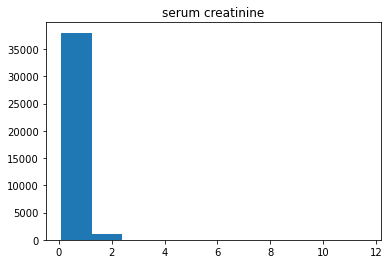

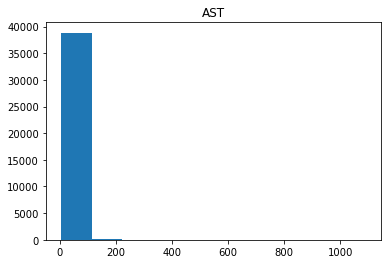

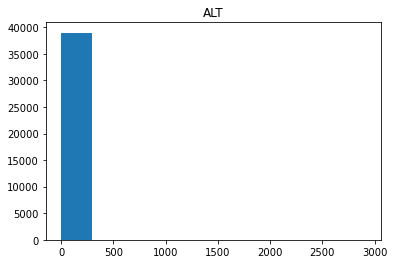

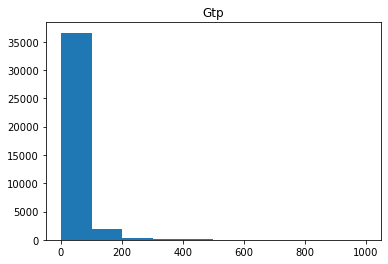

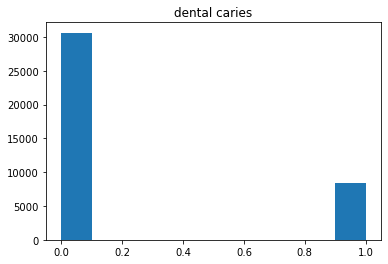

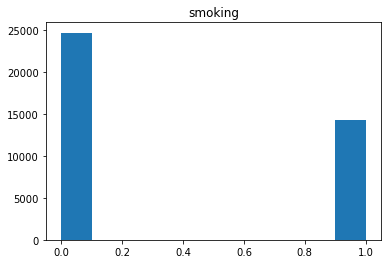

In [4]:
# loop through all columns
import seaborn as sns
import matplotlib.pyplot as plt

# loop through all columns
for col in train_dataset.columns:
    if train_dataset[col].dtype == "object":
        plt.figure()
        sns.countplot(x=col, data=train_dataset)
        plt.title(col)
    else:
        plt.figure()
        plt.hist(train_dataset[col])
        plt.title(col)
    plt.show()



[]


In [5]:
from sklearn.model_selection import train_test_split

X = train_dataset.drop(['smoking'], axis = 1)   # here we are dropping the Target feature as this is the target and 'X' is input features, the changes are not 
                                              # made inplace as we have not used 'inplace = True'
y = train_dataset['smoking']    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [33]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
#random forest
from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Test the model
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = rf_model.score(X_test, y_test)
print(accuracy_rf)

0.8001795562395794


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction import DictVectorizer
from time import time
start = time()
model = Pipeline([
('vect', DictVectorizer(sparse=False)),
('scaler', StandardScaler()),
('clf', RandomForestClassifier(random_state = 42))
])

model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Score : ",score)

stop = time()

print("Exec time : ",stop - start, " secs")

AttributeError: 'str' object has no attribute 'items'

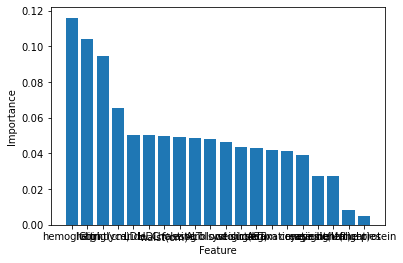

In [36]:
# Extract feature importances
importances = rf_model.feature_importances_

# Create a dataframe with feature importances and feature names
feature_importances = pd.DataFrame({"feature": X.columns, "importance": importances})

# Sort the dataframe by importance
feature_importances = feature_importances.sort_values("importance", ascending=False)

# Visualize the feature importances
plt.bar(x=feature_importances["feature"], height=feature_importances["importance"])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [29]:
!pip install shap

In [30]:
import shap
# Create a SHAP explainer
explainer = shap.Explainer(rf_model, X_train)

# Calculate feature importances
shap_values = explainer(X_test)

# Plot feature importances
shap.summary_plot(shap_values, X_test)

100%|===================| 15592/15594 [70:14<00:00]        

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.760500, while the model output was 0.800000. If this difference is acceptable you can set check_additivity=False to disable this check.

In [37]:
feature_importances

,feature,importance
13,hemoglobin,0.116076
18,Gtp,0.104310
1,height(cm),0.094679
10,triglyceride,0.065293
12,LDL,0.050430
11,HDL,0.050068
3,waist(cm),0.049567
9,Cholesterol,0.048987
17,ALT,0.048673
8,fasting blood sugar,0.047961


In [38]:
from sklearn.svm import SVC

# Create the model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Test the model
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = svm_model.score(X_test, y_test)


In [39]:
from sklearn.metrics import f1_score

# Random Forest Model
y_pred = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred)

# SVM Model
y_pred = svm_model.predict(X_test)
svm_f1 = f1_score(y_test, y_pred)


Text(0.5, 1.0, 'SVM')

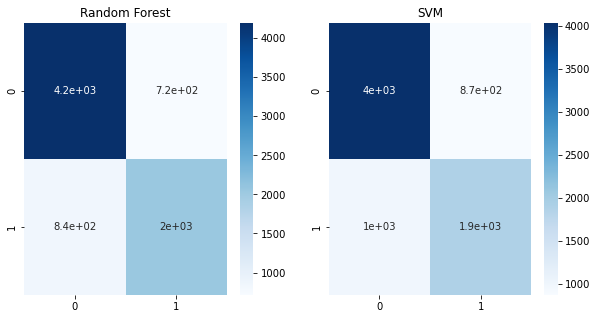

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Random Forest Model
y_pred = rf_model.predict(X_test)
rf_cm = confusion_matrix(y_test, y_pred)

# SVM Model
y_pred = svm_model.predict(X_test)
svm_cm = confusion_matrix(y_test, y_pred)

# Plotting the heatmap
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.heatmap(rf_cm, annot = True, cmap = 'Blues', ax = ax[0])
sns.heatmap(svm_cm, annot = True, cmap = 'Blues', ax = ax[1])
ax[0].set_title('Random Forest')
ax[1].set_title('SVM')


In [24]:
rf_cm

array([[4140,  744],
       [ 813, 2100]], dtype=int64)

In [23]:
from sklearn.metrics import classification_report

# Random Forest Model
y_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

# SVM Model
y_pred = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      4884
           1       0.74      0.72      0.73      2913

    accuracy                           0.80      7797
   macro avg       0.79      0.78      0.79      7797
weighted avg       0.80      0.80      0.80      7797

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      4884
           1       0.67      0.65      0.66      2913

    accuracy                           0.75      7797
   macro avg       0.73      0.73      0.73      7797
weighted avg       0.75      0.75      0.75      7797



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt

# Generate a random dataset
X, y = make_classification(n_features=10, random_state=1)

# Train the Random Forest model
clf = RandomForestClassifier(random_state=1)
clf.fit(X, y)

# Extract feature importances
importances = clf.feature_importances_

# Create a dataframe with feature importances and feature names
feature_importances = pd.DataFrame({"feature": X.columns, "importance": importances})

# Sort the dataframe by importance
feature_importances = feature_importances.sort_values("importance", ascending=False)

# Visualize the feature importances
plt.bar(x=feature_importances["feature"], height=feature_importances["importance"])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()
